In [ ]:
!pip install gensim
import gensim.downloader as api
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 69.5 MB/s eta 0:00:00


Load Pre-trained Embeddings

In [ ]:
# Load pre-trained Word2Vec model
model = api.load("word2vec-google-news-300")

# Print vocabulary size
print("Vocabulary Size:", len(model))

# Display vector for example word
print("\nVector for word 'king':")
print(model['king'])


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Vocabulary Size: 3000000

Vector for word 'king':
[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  

## **Word Similarity**

In [ ]:
word_pairs = [
    ('doctor','nurse'),
    ('cat','dog'),
    ('car','bus'),
    ('king','queen'),
    ('man','woman'),
    ('teacher','student'),
    ('sun','moon'),
    ('apple','banana'),
    ('computer','keyboard'),
    ('india','china')
]

print("\nWord Similarities:\n")

for w1, w2 in word_pairs:
    similarity = model.similarity(w1, w2)
    print(f"{w1} - {w2} : {similarity:.4f}")



Word Similarities:

doctor - nurse : 0.6320
cat - dog : 0.7609
car - bus : 0.4693
king - queen : 0.6511
man - woman : 0.7664
teacher - student : 0.6301
sun - moon : 0.4263
apple - banana : 0.5318
computer - keyboard : 0.3964
india - china : 0.3533


## Nearest Neighbor Exploration

In [ ]:
words = ['king','university','doctor','music','india']

for word in words:
    print(f"\nTop similar words to '{word}':")
    print(model.most_similar(word, topn=5))



Top similar words to 'king':
[('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474)]

Top similar words to 'university':
[('universities', 0.7003918886184692), ('faculty', 0.6780907511711121), ('unversity', 0.6758289933204651), ('undergraduate', 0.6587094664573669), ('univeristy', 0.6585438251495361)]

Top similar words to 'doctor':
[('physician', 0.7806021571159363), ('doctors', 0.747657299041748), ('gynecologist', 0.6947518587112427), ('surgeon', 0.6793398261070251), ('dentist', 0.6785441040992737)]

Top similar words to 'music':
[('classical_music', 0.7197794318199158), ('jazz', 0.6834640502929688), ('Music', 0.6595720648765564), ('Without_Donny_Kirshner', 0.6416222453117371), ('songs', 0.6396344304084778)]

Top similar words to 'india':
[('indian', 0.6967039704322815), ('usa', 0.6836211085319519), ('pakistan', 0.681516706943512), ('chennai', 0.6675503253936768), ('america'

### Word Analogy Tasks

In [ ]:
print("king - man + woman = ")
print(model.most_similar(positive=['king','woman'], negative=['man'], topn=1))

print("\nparis - france + india = ")
print(model.most_similar(positive=['paris','india'], negative=['france'], topn=1))

print("\nteacher - school + hospital = ")
print(model.most_similar(positive=['teacher','hospital'], negative=['school'], topn=1))


king - man + woman = 
[('queen', 0.7118193507194519)]

paris - france + india = 
[('chennai', 0.5442505478858948)]

teacher - school + hospital = 
[('Hospital', 0.6331106424331665)]


## Visualization (Optional)

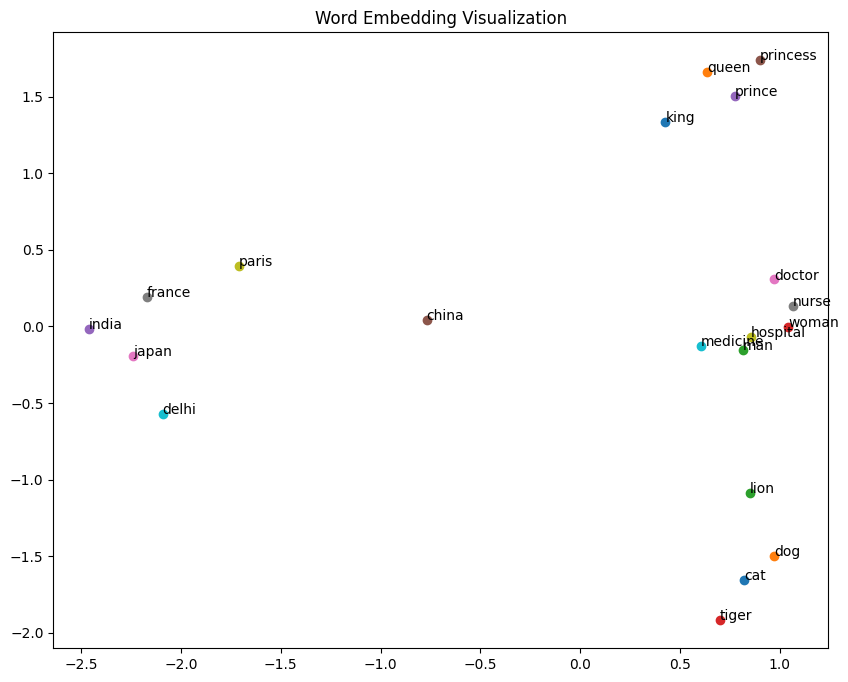

In [ ]:
words = [
    'king','queen','man','woman','prince','princess',
    'doctor','nurse','hospital','medicine',
    'cat','dog','lion','tiger',
    'india','china','japan','france','paris','delhi'
]

word_vectors = np.array([model[word] for word in words])

# Reduce to 2D using PCA
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

plt.figure(figsize=(10,8))

for i, word in enumerate(words):
    plt.scatter(result[i,0], result[i,1])
    plt.text(result[i,0], result[i,1], word)

plt.title("Word Embedding Visualization")
plt.show()


In [ ]:
print("""
Reflection:
Word embeddings capture semantic relationships from context.
Similar words appear close in vector space.
Analogies work because embeddings encode relational patterns.
However, embeddings may fail for ambiguous words.
Bias in training data can influence results.
Overall, embeddings provide meaningful dense representations of words.
""")


Reflection:
Word embeddings capture semantic relationships from context.
Similar words appear close in vector space.
Analogies work because embeddings encode relational patterns.
However, embeddings may fail for ambiguous words.
Bias in training data can influence results.
Overall, embeddings provide meaningful dense representations of words.

